<a href="https://colab.research.google.com/github/Akshath47/MachineLearningTests/blob/main/loanpredictor_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Classification Machine Learning Model**

In [ ]:
from google.colab import files
path_to_file = list(files.upload().keys())[0]

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [ ]:
df = pd.read_csv('/content/bank-full.csv', sep=";")

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df = df.drop(labels=['duration', 'campaign', 'pdays', 'previous', 'poutcome'], axis=1)

In [ ]:
#encoding categorical strings
le = LabelEncoder()
df['job'] = le.fit_transform(df['job'])
df['marital'] = le.fit_transform(df['marital'])
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['day'] = le.fit_transform(df['day'])
df['month'] = le.fit_transform(df['month'])

In [ ]:
scaler = StandardScaler()
df[['balance']] = scaler.fit_transform(df[['balance']])

In [ ]:
test_data, train_data = train_test_split(df, test_size=0.2, random_state=20)

In [ ]:
y_test = test_data['y']
test_data.drop(['y'], axis=1, inplace=True)
y_train = train_data['y']
train_data.drop(['y'], axis=1, inplace=True)

# **Logistic Regression**

In [ ]:
logreg = LogisticRegression(max_iter=4000)
logreg.fit(train_data, y_train)

LogisticRegression(max_iter=4000)

In [ ]:
y_pred_logreg = logreg.predict(test_data)

In [ ]:
#Accuracy metrics
accuracy_logreg = logreg.score(test_data, y_test)
#f1_score = f1_score(y_train, y_pred, average=None)
print(f"Accuracy : {accuracy_logreg}")
#print(f"F1 Score : {f1_score}")

Accuracy : 0.8823269188232692


In [ ]:
scores_logreg = cross_val_score(logreg, train_data, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores_logreg)

scores_logreg = pd.Series(scores_logreg)
scores_logreg.min(), scores_logreg.mean(), scores_logreg.max()

Cross-Validation Accuracy Scores [0.8839779  0.8839779  0.8839779  0.88495575 0.88495575 0.88495575
 0.88384956 0.88384956 0.88274336 0.88495575]


(0.8827433628318584, 0.8842199188383123, 0.8849557522123894)

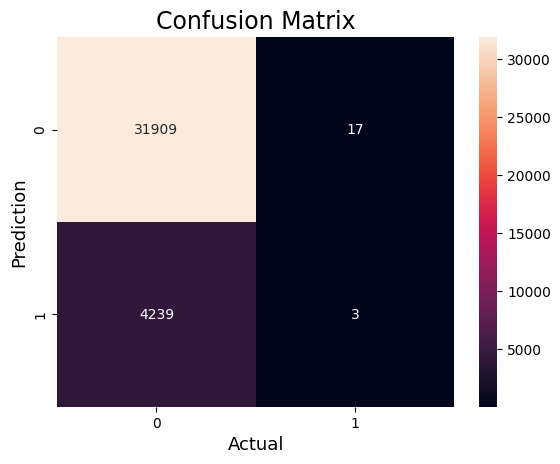

In [ ]:
#compute the confusion matrix.
cm = confusion_matrix(y_test,y_pred_logreg)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

# **K Nearest Neighbour**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(train_data, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
y_pred_knn = knn.predict(test_data)

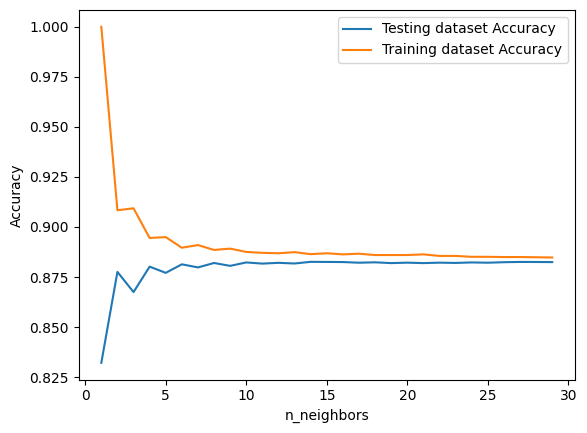

In [ ]:
#Finding best value of K
neighbors = np.arange(1, 30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data, y_train)

    train_accuracy[i] = knn.score(train_data, y_train)
    test_accuracy[i] = knn.score(test_data, y_test)

# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#Accuracy metrics
accuracy_knn = knn.score(test_data, y_test)
print(f"Accuracy : {accuracy_knn}")

Accuracy : 0.8824651625746516


In [ ]:
scores_knn = cross_val_score(knn, train_data, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores_knn)

scores_knn = pd.Series(scores_knn)
scores_knn.min(), scores_knn.mean(), scores_knn.max()

Cross-Validation Accuracy Scores [0.88618785 0.88508287 0.88176796 0.88606195 0.88716814 0.88384956
 0.88274336 0.88495575 0.88495575 0.88495575]


(0.881767955801105, 0.8847728939519875, 0.8871681415929203)

# **SVM (Support Vector Machine)**

In [ ]:
svm = SVC(kernel = 'linear')
svm.fit(train_data, y_train)

SVC(kernel='linear')

In [ ]:
y_pred_svm = svm.predict(test_data)

In [ ]:
#Accuracy metrics
accuracy_svm = svm.score(test_data, y_test)
print(f"Accuracy : {accuracy_svm}")

Accuracy : 0.8827140013271401


In [ ]:
scores_svm = cross_val_score(svm, train_data, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores_svm)

scores_svm = pd.Series(scores_svm)
scores_svm.min(), scores_svm.mean(), scores_svm.max()